# Exploratory Data Analysis - Laptops Pricing datase

# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables

## For this lab, we will be using the following libraries:

- skillsnetwork for downloading the data
- pandas for managing the data.
- numpy for mathematical operations.
- scipy for statistical operations.
- seaborn for visualizing the data.
- matplotlib for additional plotting tools

## Install Required Libraries
You can install the required libraries by simply running the pip install command with a % sign before it. For this environment, seaborn library requires installation.

In [1]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries
We recommend you import all required libraries in one place (here):

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## Import the dataset
You should download the modified version of the data set from the last module. Run the following code block to download the CSV file to this environment.

The functions below will download the dataset into your browser:

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [5]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

In [6]:
df = pd.read_csv(file_name, header=0)

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## Task 1 - Visualizing individual feature patterns
Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

(0.0, 3974.15)

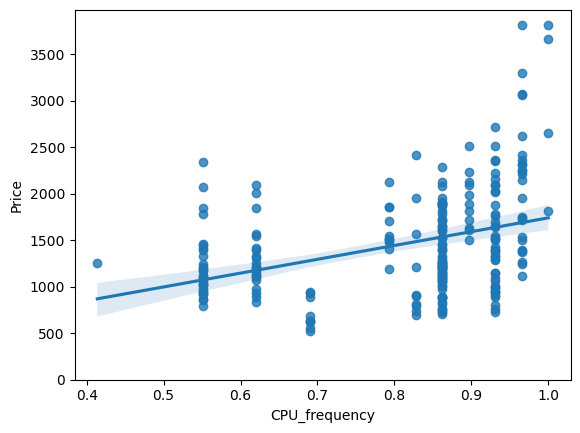

In [12]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

In [16]:
df[["CPU_frequency","Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


(0.0, 3974.15)

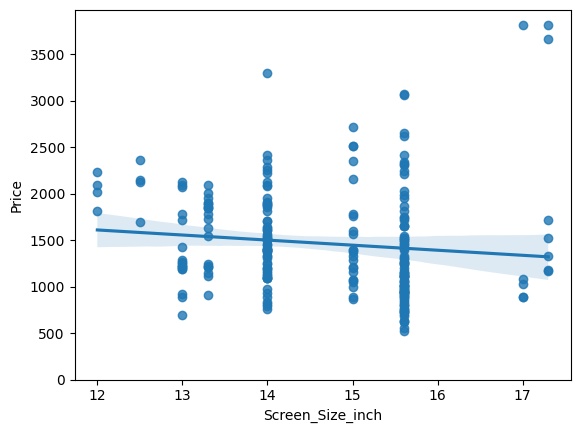

In [14]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

In [17]:
df[["Screen_Size_inch","Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


(0.0, 3974.15)

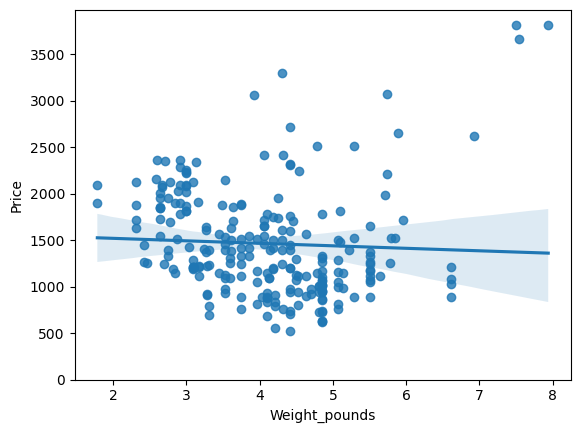

In [15]:
sns.regplot(x="Weight_pounds", y= "Price", data=df)
plt.ylim(0,)

In [18]:
df[["Weight_pounds","Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


In [19]:
df[["CPU_frequency","Weight_pounds","Screen_Size_inch","Price"]].corr()

,CPU_frequency,Weight_pounds,Screen_Size_inch,Price
CPU_frequency,1.000000,0.066522,-0.000948,0.366666
Weight_pounds,0.066522,1.000000,0.797534,-0.050312
Screen_Size_inch,-0.000948,0.797534,1.000000,-0.110644
Price,0.366666,-0.050312,-0.110644,1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

### Categorical features¶
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<AxesSubplot:xlabel='Category', ylabel='Price'>

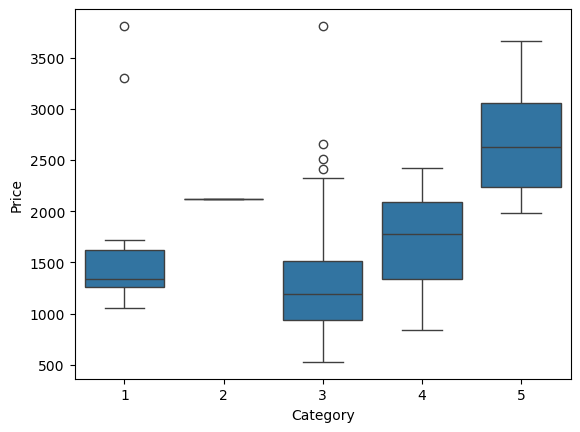

In [21]:
sns.boxplot(x="Category", y="Price", data=df)


<AxesSubplot:xlabel='GPU', ylabel='Price'>

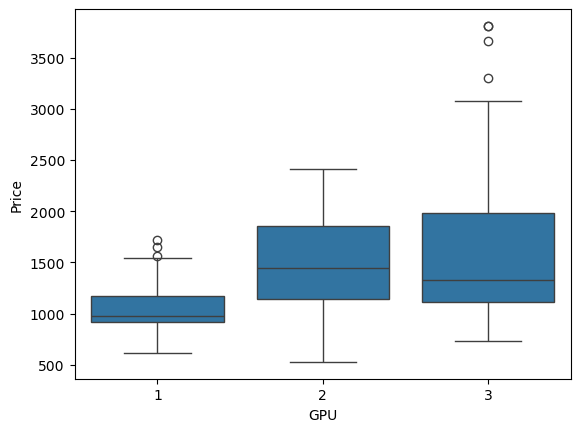

In [22]:
sns.boxplot(x="GPU", y="Price", data=df)

<AxesSubplot:xlabel='OS', ylabel='Price'>

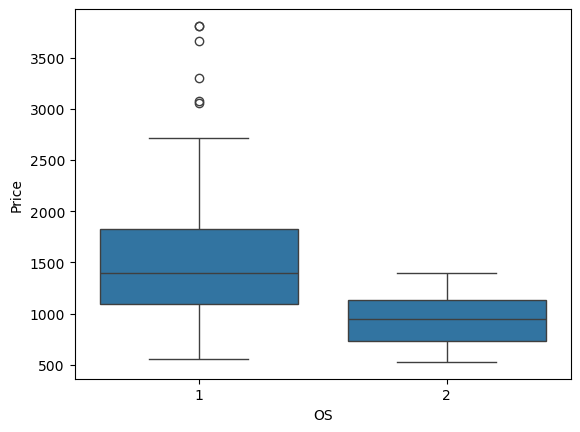

In [23]:
sns.boxplot(x="OS", y="Price", data=df)

<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

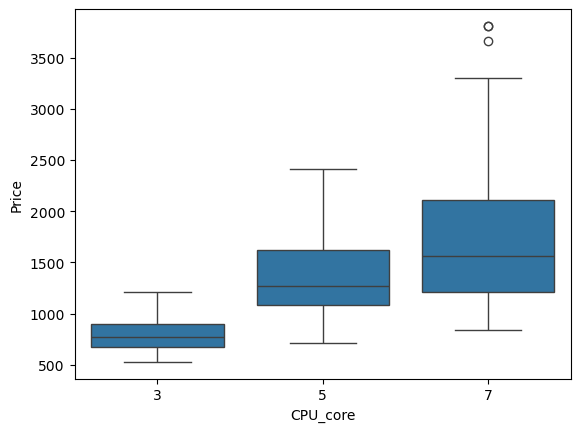

In [24]:
sns.boxplot(x="CPU_core", y="Price", data=df)

<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

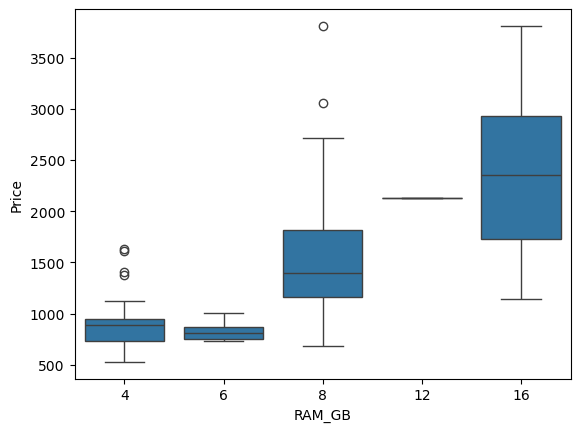

In [25]:
sns.boxplot(x="RAM_GB", y="Price", data=df)

<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

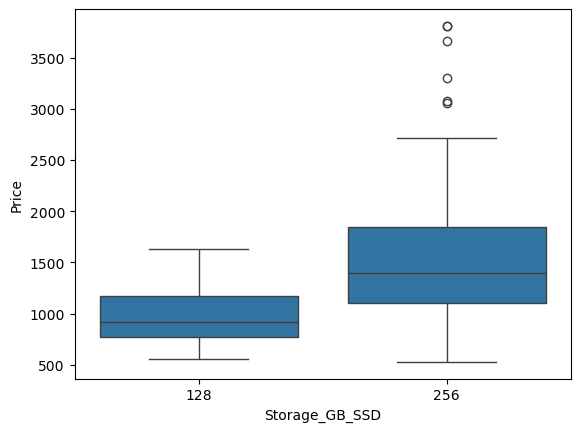

In [26]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

# Task 2 - Descriptive Statistical Analysis

In [31]:
print(df.describe())
print(df.describe(include =["object"]))


       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

In [43]:
df_group = df[["GPU","CPU_core","Price"]]
df_grouping = df_group.groupby(["GPU", "CPU_core"], as_index=False).mean()
print(df_grouping)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [35]:
group_pivot = df_grouping.pivot(index="GPU", columns="CPU_core")
print(group_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


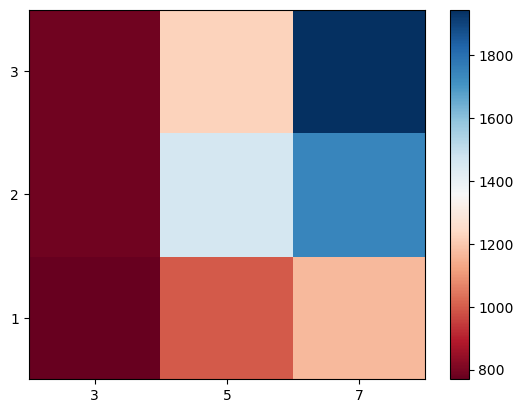

In [40]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

#label names
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=0)

fig.colorbar(im)
plt.show()

# Task 4 - Pearson Correlation and p-values
Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.

In [41]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857849  with a P-value of P = 3.6815606288424503e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.3666655589258861  with a P-value of P = 5.50246335071342e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810297  with a P-value of P = 0.00014898923191724168
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118291  with a P-value of P = 0.08853397846830648
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.050312258377515455  with a P-value of P = 0.4397693853433897
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551174  with a P-value of P = 7.912950127008979e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827356  with a P-value of P = 0.0005696642559246805
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881427  w

### Ibrahim Musbaudeen